In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('/content/sample_data/loan.csv', delimiter=',', header='infer', names=None, index_col=None, usecols=None, engine=None, on_bad_lines='skip')

<ipython-input-28-c988ee7d0b3e>:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/sample_data/loan.csv', delimiter=',', header='infer', names=None, index_col=None, usecols=None, engine=None, on_bad_lines='skip')


In [29]:
df.shape

(36979, 111)

In [30]:
working_df = df[['id','loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','grade','home_ownership','annual_inc','verification_status','issue_d','loan_status','purpose','zip_code','dti','delinq_2yrs','open_acc','pub_rec','total_acc','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','last_pymnt_amnt']]

In [31]:
working_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,...,open_acc,pub_rec,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,RENT,24000.0,...,3,0,9,5863.155187,5833.84,5000.00,863.16,0.00,0.00,171.62
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,RENT,30000.0,...,3,0,4,1008.710000,1008.71,456.46,435.17,0.00,117.08,119.66
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,RENT,12252.0,...,2,0,10,3005.666844,3005.67,2400.00,605.67,0.00,0.00,649.91
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,RENT,49200.0,...,10,0,37,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,357.48
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,RENT,80000.0,...,15,0,38,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,67.79


In [32]:
working_df.shape

(36979, 27)

In [33]:
obj = (working_df.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 9


In [34]:
working_df['term'] = working_df['term'].apply(lambda x: int(x[:3]))

<ipython-input-34-55c556b7957c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_df['term'] = working_df['term'].apply(lambda x: int(x[:3]))


In [35]:
working_df['int_rate'] = working_df['int_rate'].apply(lambda x: float(x.replace('%', '')))

<ipython-input-35-6fb7f4eed2b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_df['int_rate'] = working_df['int_rate'].apply(lambda x: float(x.replace('%', '')))


In [41]:
working_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,...,open_acc,pub_rec,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,RENT,24000.0,...,3,0,9,5863.155187,5833.84,5000.00,863.16,0.00,0.00,171.62
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,RENT,30000.0,...,3,0,4,1008.710000,1008.71,456.46,435.17,0.00,117.08,119.66
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,RENT,12252.0,...,2,0,10,3005.666844,3005.67,2400.00,605.67,0.00,0.00,649.91
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,RENT,49200.0,...,10,0,37,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,357.48
4,1075358,3000,3000,3000.0,60,12.69,67.79,B,RENT,80000.0,...,15,0,38,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,67.79


<ipython-input-36-36090294bb90>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(working_df['loan_amnt'])


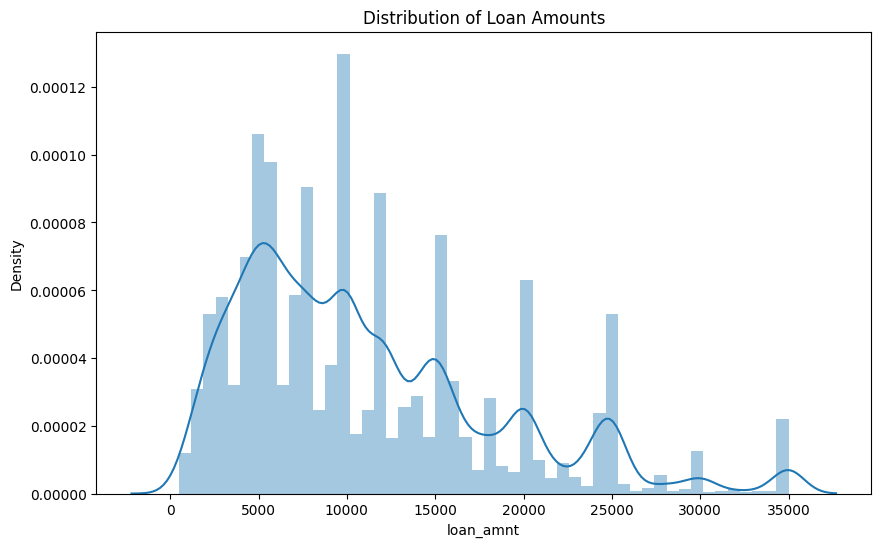

In [36]:

plt.figure(figsize=(10, 6))
sns.distplot(working_df['loan_amnt'])
plt.title('Distribution of Loan Amounts')
plt.show()

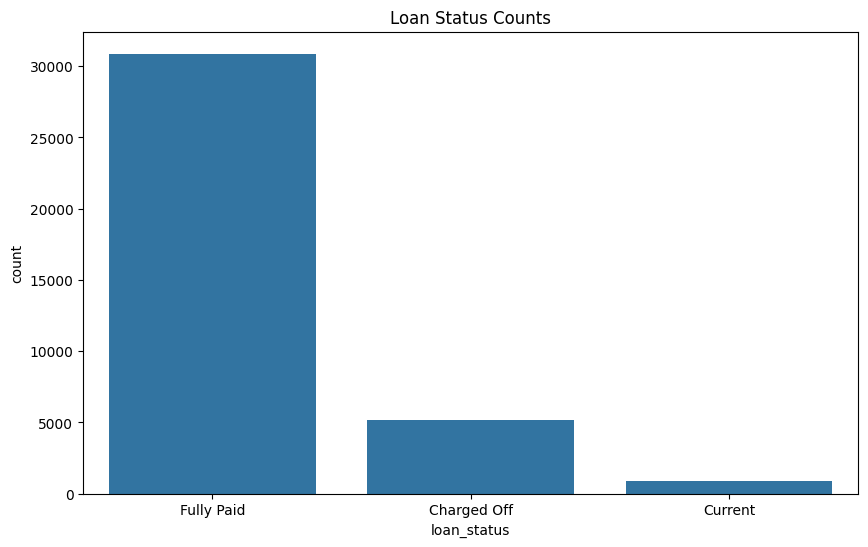

In [37]:

plt.figure(figsize=(10, 6))
sns.countplot(x='loan_status', data=working_df)
plt.title('Loan Status Counts')
plt.show()

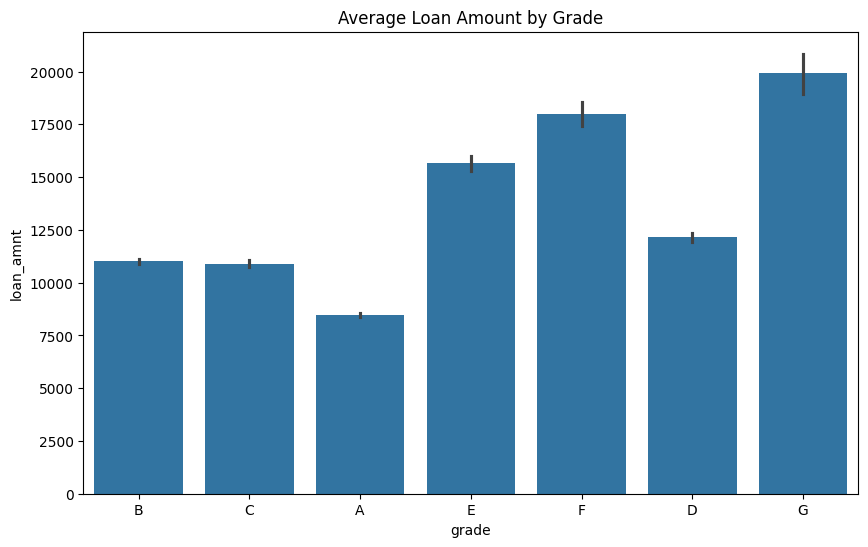

In [38]:

plt.figure(figsize=(10, 6))
sns.barplot(x='grade', y='loan_amnt', data=working_df)
plt.title('Average Loan Amount by Grade')
plt.show()

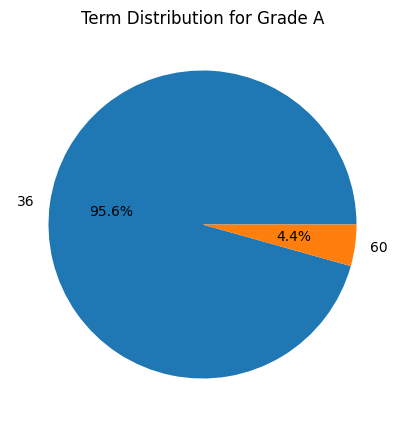

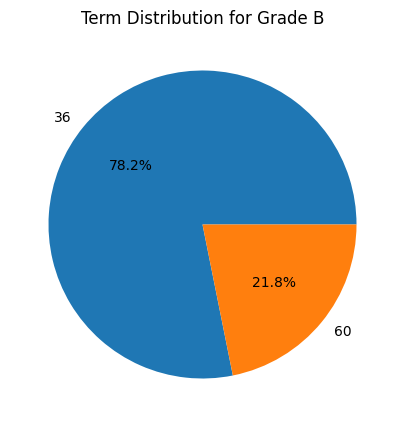

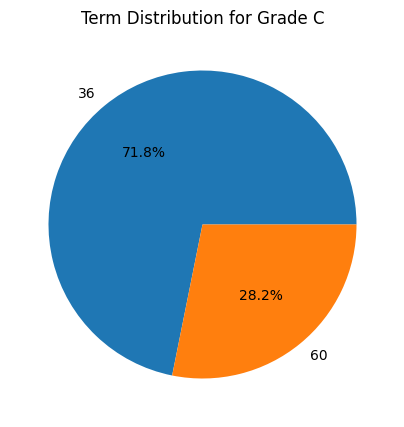

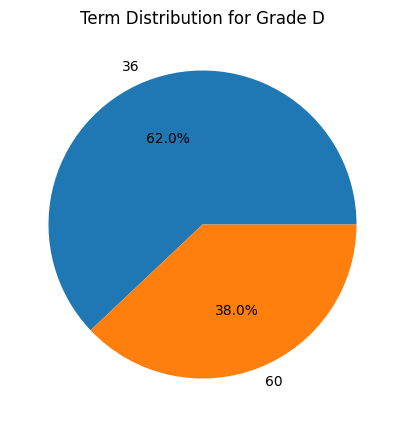

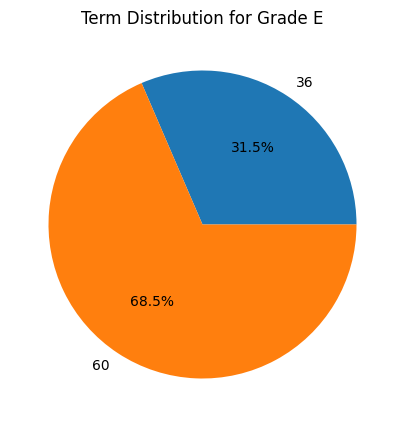

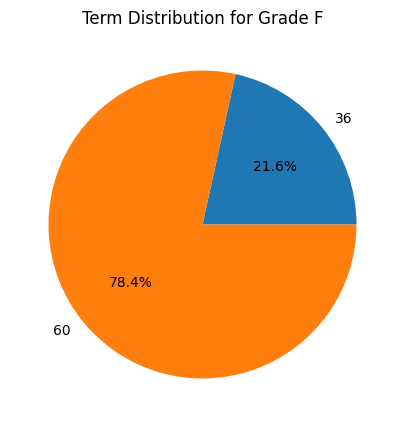

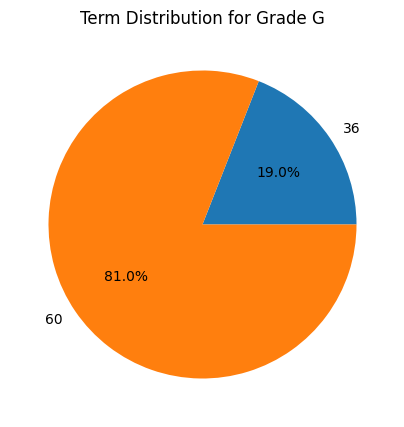

In [73]:
grouped_data = working_df.groupby(['grade', 'term']).size().unstack()

for grade in grouped_data.index:
    plt.figure(figsize=(5, 5))
    plt.pie(grouped_data.loc[grade], labels=grouped_data.columns, autopct="%1.1f%%")
    plt.title(f'Term Distribution for Grade {grade}')
    plt.show()

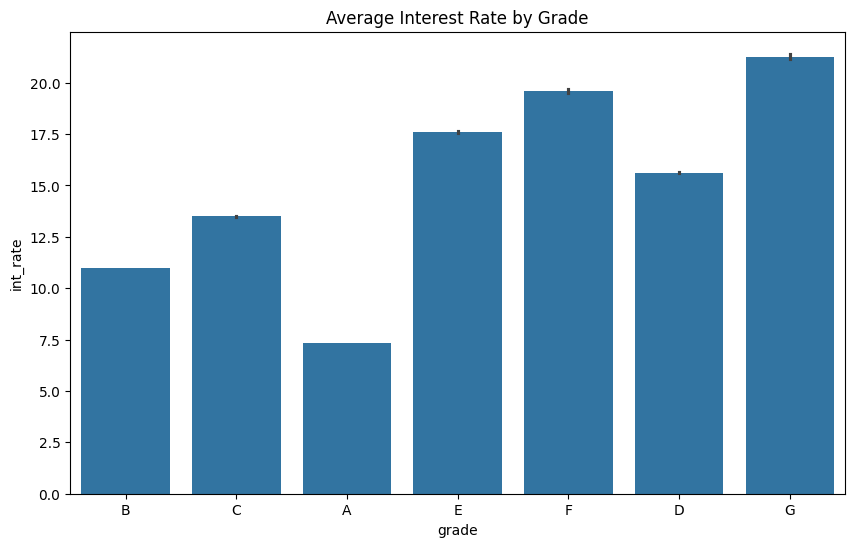

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x='grade', y='int_rate', data=working_df)
plt.title('Average Interest Rate by Grade')
plt.show()

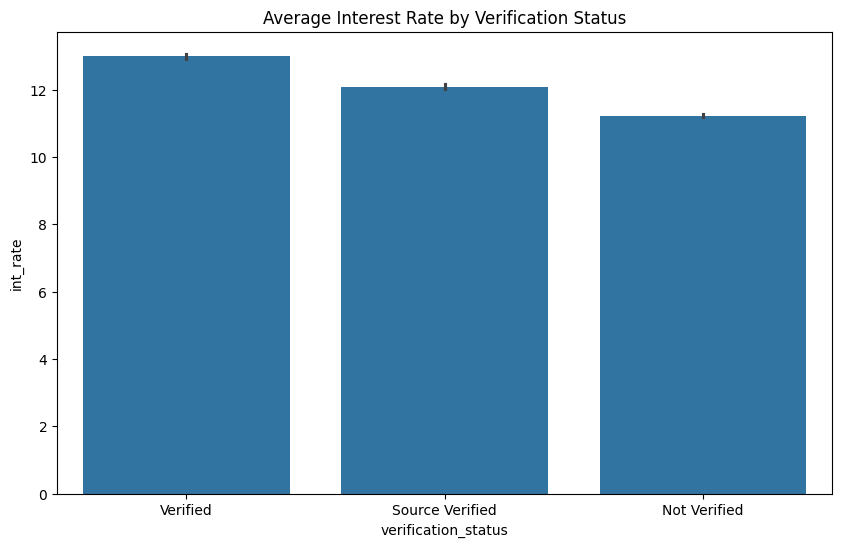

In [60]:
# Average interest rate by verification status
plt.figure(figsize=(10, 6))
sns.barplot(x='verification_status', y='int_rate', data=working_df)
plt.title('Average Interest Rate by Verification Status')
plt.show()


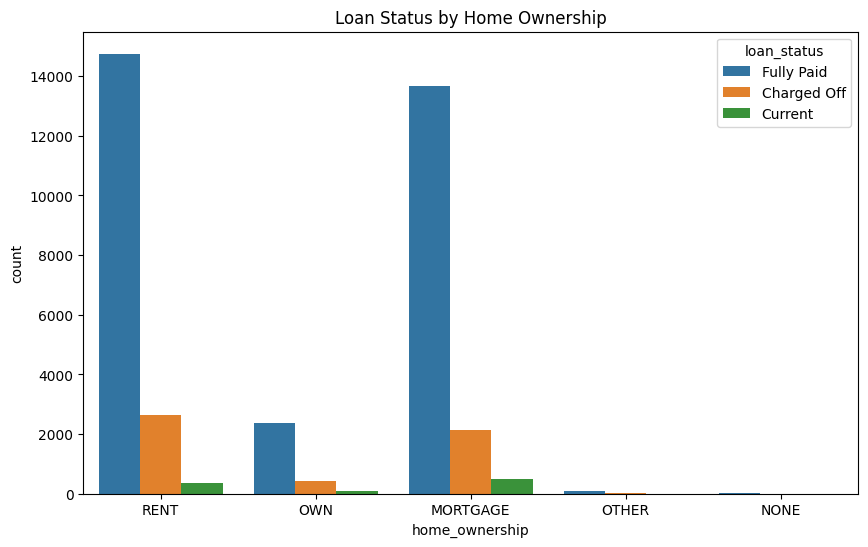

In [61]:
# Loan status by home ownership
plt.figure(figsize=(10, 6))
sns.countplot(x='home_ownership', hue='loan_status', data=working_df)
plt.title('Loan Status by Home Ownership')
plt.show()

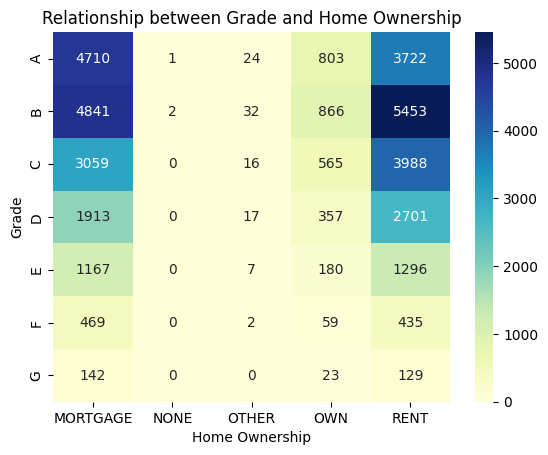

In [58]:
cross_tab = pd.crosstab(working_df['grade'], working_df['home_ownership'])

# Create a heatmap
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", fmt="g")
plt.xlabel("Home Ownership")
plt.ylabel("Grade")
plt.title("Relationship between Grade and Home Ownership")
plt.show()


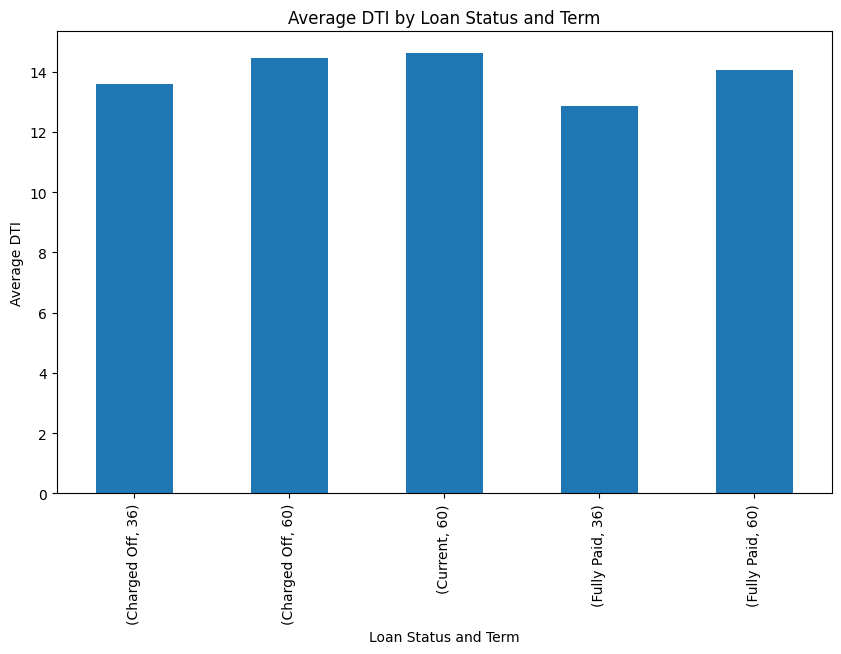

In [71]:
grouped_data = working_df.groupby(['loan_status', 'term'])['dti'].mean()

plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar')
plt.title('Average DTI by Loan Status and Term')
plt.xlabel('Loan Status and Term')
plt.ylabel('Average DTI')
plt.show()


In [62]:
def should_bank_give_loan(df):
  df_copy = df.copy()
  def risk_level(grade):
    if grade in ['A', 'B', 'C']:
      return 'Low'
    elif grade in ['D', 'E', 'F', 'G']:
      return 'Medium'
    else:
      return 'High'

  df_copy['risk_level'] = df_copy['grade'].apply(risk_level)

  avg_loan_amount_by_risk = df_copy.groupby('risk_level')['loan_amnt'].mean()

  avg_interest_rate_by_risk = df_copy.groupby('risk_level')['int_rate'].mean()

  df_copy['dti_ratio'] = df_copy['dti'] / 100

  df_copy['loan_term_years'] = df_copy['term'] / 12

  df_copy['loan_decision'] = 'Yes'

  df_copy.loc[(df_copy['risk_level'] == 'High') & ((df_copy['dti_ratio'] > 0.5) | (df_copy['loan_term_years'] > 5)), 'loan_decision'] = 'No'
  # Print details
  print(f"Average loan amount by risk level:\n{avg_loan_amount_by_risk}")
  print(f"\nAverage interest rate by risk level:\n{avg_interest_rate_by_risk}")
  print(f"\nNumber of borrowers approved for loan: {df_copy['loan_decision'].value_counts()['Yes']}")

should_bank_give_loan(working_df)


Average loan amount by risk level:
risk_level
Low       10144.956734
Medium    14084.323367
Name: loan_amnt, dtype: float64

Average interest rate by risk level:
risk_level
Low       10.461333
Medium    16.824035
Name: int_rate, dtype: float64

Number of borrowers approved for loan: 36979
